# Midterm Exam Winter 2022

This midterm exam is an open-book, open-resource exam. However, you may not collaborate with anyone. Please send clarification questions and hint requests to me at [adrian.liu2@mcgill.ca](mailto:adrian.liu2@mcgill.ca). Submission instructions are below. The exam is due at 11:59:59 Eastern on February 24th, 2022.

You may copy and paste code from your previous assignments, but __you must cite your sources__. E.g., if you want to use a function that you wrote in Coding Lab 02, please include the comment "this function was copied from Coding Lab 02"

**There will be a few points available in questions 4 and 6 for good coding habits. For example, if there is a bit of code that you intend to reuse, define a function rather than copying and pasting it multiple times!**

## Question 1

I have created a ``git`` repo here: https://github.com/acliu/PHYS321_Midterm2022.git. In this repo there is an old ``git`` commit with the commit message "movie quote commit here". In that commit is a file called ``movie_quote.txt`` (which no longer exists in the current commit), and inside the file is a quote from a movie:
1. Retrieve this quote and write it down below.
2. Write down the ``git`` commands you used to clone the repo and the commands you used to help you retrieve the quote.

There are multiple ways to do this using ``git``. I am not picky about how you do this, as long as 1) you used the command line, and 2) it isn't "I went to the Github website and looked there".

1. "May the force be with you"
2. I retrived this quote with the following commands: 
    * git clone https://github.com/acliu/PHYS321_Midterm2022.git
    * git rev0-list HEAD -- movie_quote.txt --> this steps returns the last commit corresponding to the file
    * git revert 23066d567dcbdf3d535186dc433da751476e139f
    
    
Following these steps restores the file movie_quote.txt in our repo; we can then open the file and read the quote. Notice that we can also skip the second step if we go to the Githubwebsite and look for the code 23066d567dcbdf3d535186dc433da751476e139f corresponding to the last commit with the file.

## Question 2

Create a **new** repo on the ``github`` website and clone it. Do an initial commit of this Jupyter notebook locally on your command line and commit with the message "first commit of midterm". Do this now (because I will be looking for a commit in your history prior to your final submission). Push to your repo. Write down all the commands that you used on the command line to do this.

1. To clone the repository: git clone https://github.com/LauraG15/PHYS321_midterm.git
2. To move inside this new folder: cd /c/Users/15145/Desktop/Universidad/Semestre_6/Obsv._Astrophysics/PHYS321_midterm

Manually, in my computer, I moved the jupyter notebook from where it was to the new repository PHYS321_midterm

3. Add jupyter notebook: git add "Midterm2022.ipynb" 
4. Commit: git commit -m "first commit of midterm" 
5. Push: git push origin main 

## Question 3

Note that although the answers to 3(a) and 3(c) can be found by Googling, to get full credit you will need to show how you can get the answer using code. 

__a)__ A few years ago people thought that the star Betelgeuse could go supernova. Where is Betelgeuse (in RA and DEC)?

We can easily use the Astropy module to find the location of Betelgeuse:

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
Betelgeuse = SkyCoord.from_name('Betelgeuse')
print(Betelgeuse)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.407064)>


__b)__ Is Betelgeuse viewable from all parts of the northern hemisphere? Is it viewable from all parts of the southern hemisphere?

To answer this question I will write code that:
1. Determines an observer in three different parts of the Northern and Southern hemispheres as shown in the Figure. 
<div>
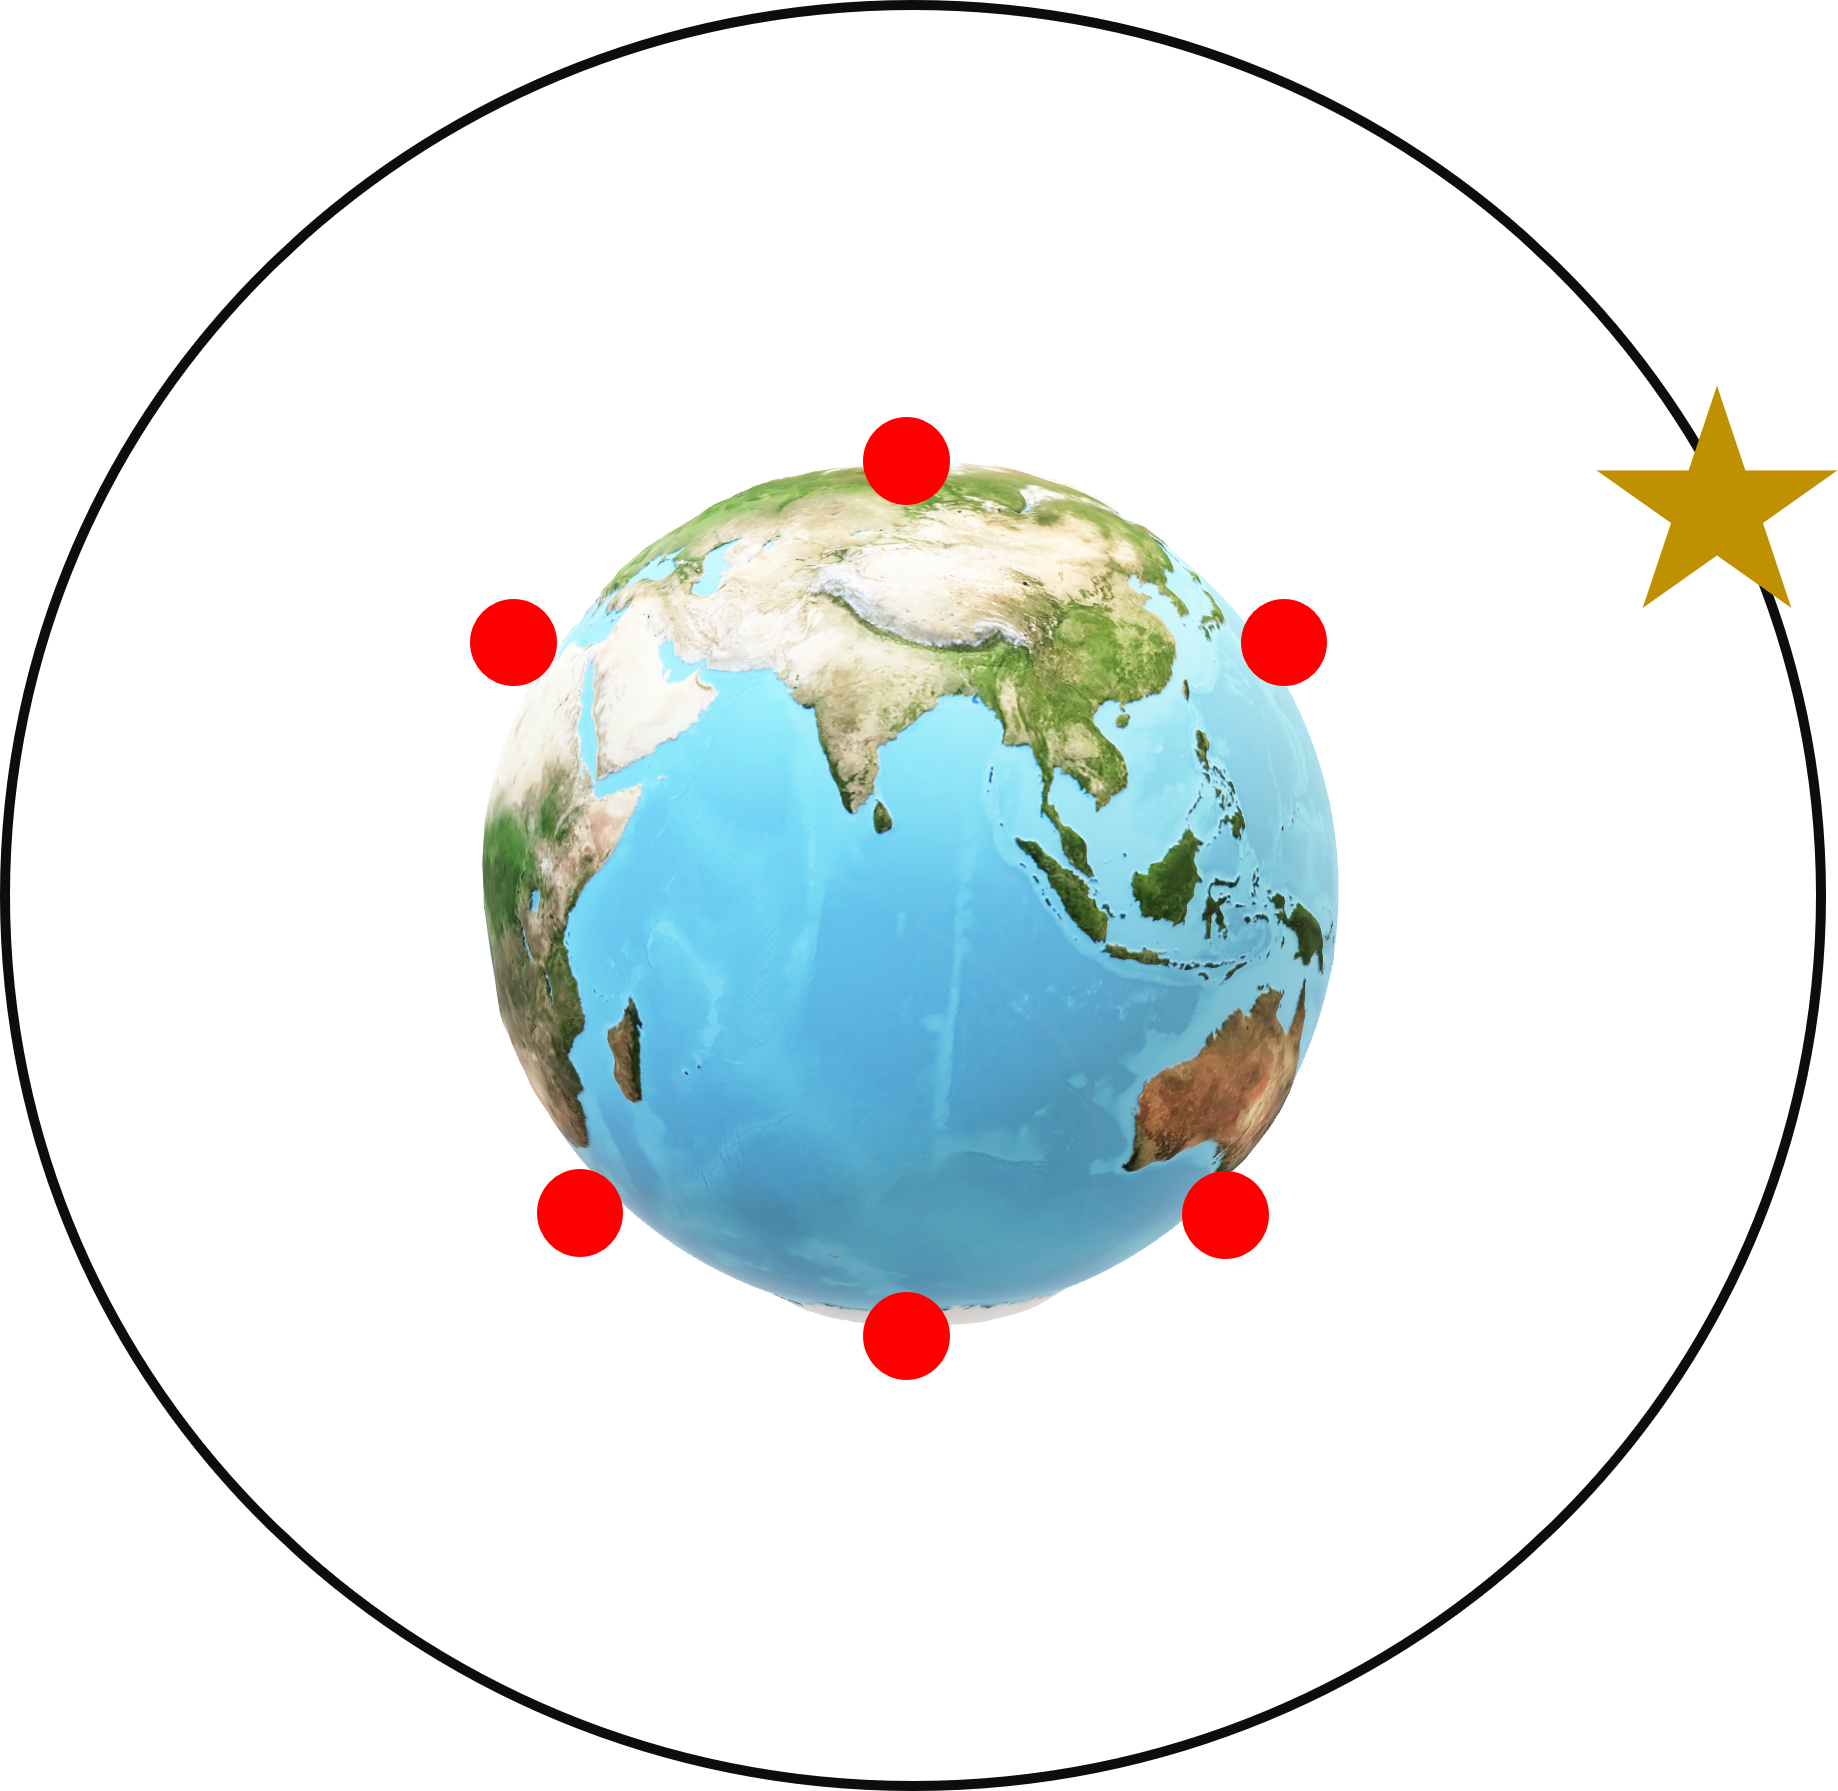
</div>


2. From a duration of several hours, finds the altitude of Betelgeuse and the Sun from each location.
3. Plots altitude as a function of time.

From the plots, we will be able to tell whether Betelgeuse is visible from these locations during this time. However, let's make some "predictions" before we see the plots:
* Because of Betelgeuse's DEC (~7 deg above the horizon), we can tell it is NOT visible from the south pole. 
* If we don't consider the rotation of the Earth, Betelgeuse should also not be visible from what I call North-left and South-left locations. However, if we incorporate Eath's rotation, we should see that Betelgeuse eventually becomes visible to these locations. 
* We need to be careful with the Sun! If it's altitude is above the horizon, we won't be able to see Betelgeuse. 

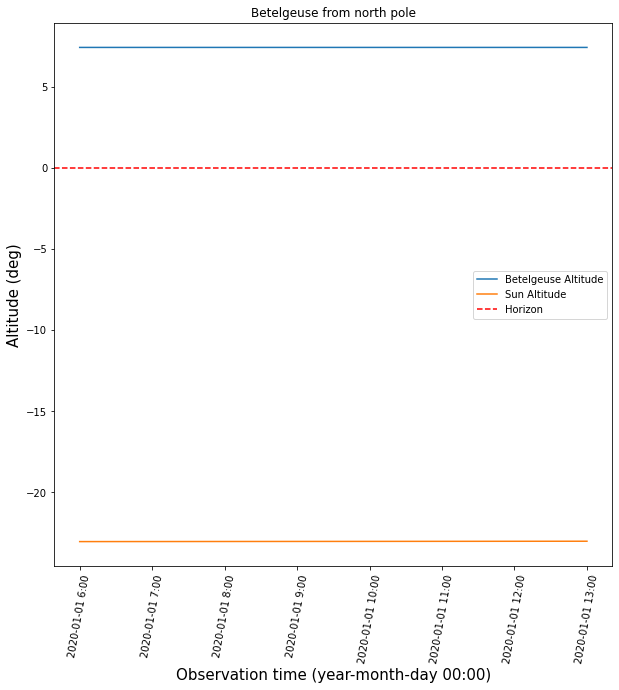

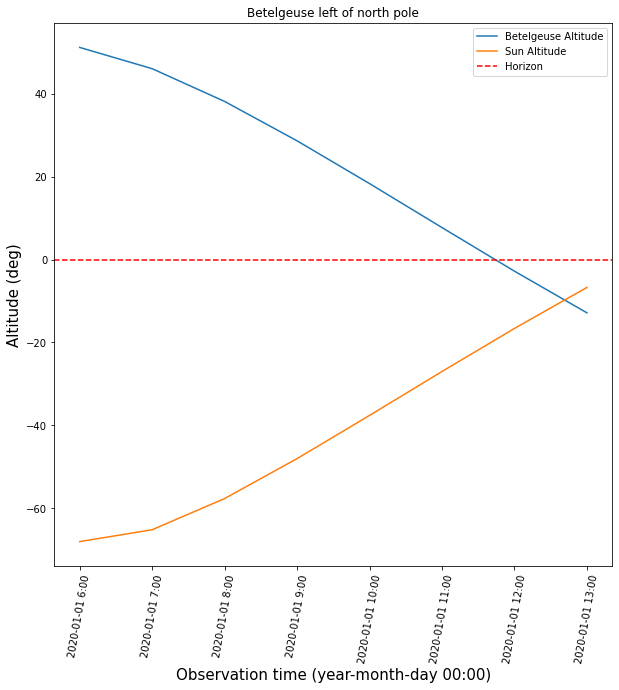

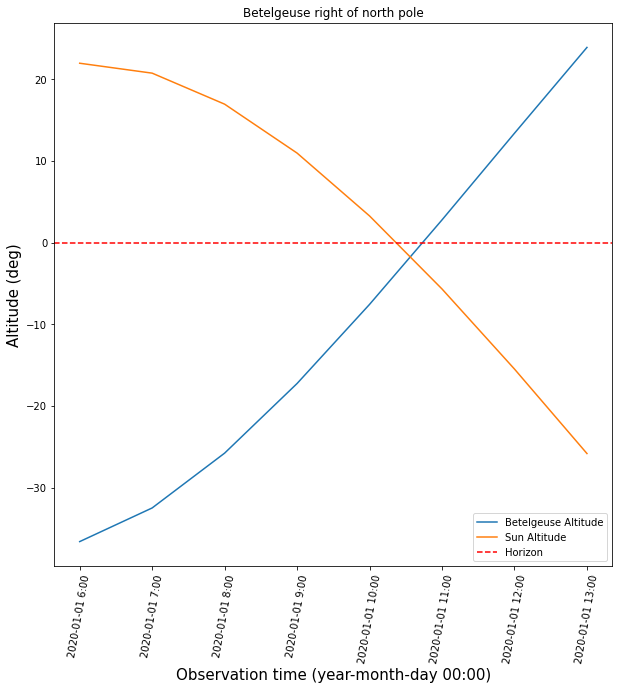

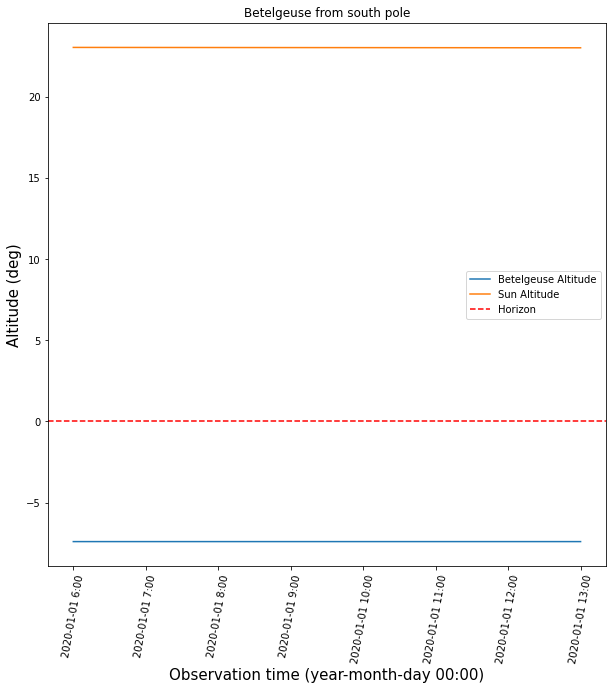

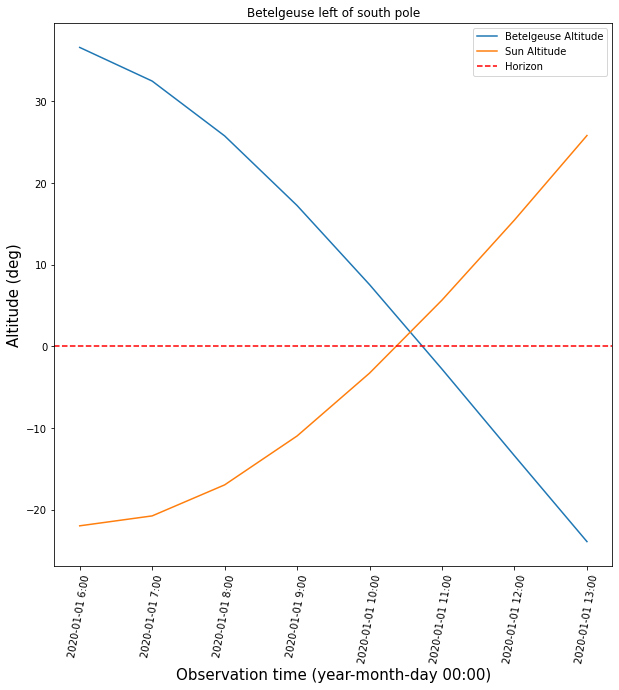

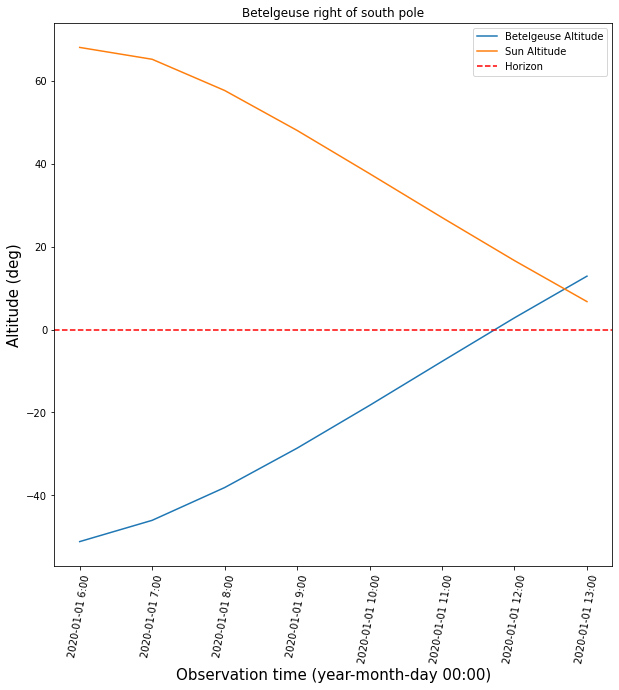

In [2]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.coordinates import get_sun
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

#The methods used inside this function are taken from Lab01
def betelgeuse_diff_ref_frame(loc, obs_time, title, year, month, hour_period, hour_start, day_start):
    
    #Create reference frame
    ref_frame = AltAz(location=loc, obstime=obs_time)
    
    #Transfrom to reference frame
    Betelgeuse.transform_to(ref_frame)
    
    hour = hour_start #starting time is 6:00 UTC
    day = day_start #start at this day
    times = []


    for i in range(hour_period):
        if hour > 23: #if we are 24 hours after
            day += 1 #after 24 hous --> new day
            hour = 0 #restart the hour
        
        if day < 10:
            times.append(year + '-' + month + '-0' + str(day) + ' ' + str(hour) + ':00')
        else: #day > 10 --> we do not need a 0
            times.append(year + '-' + month + '-' + str(day) + ' ' + str(hour) + ':00')
        
        hour += 1 
        
    times_january = np.array(times) #create array of times 
    obs_times_january = Time(times_january) #create Time object
    ref_frames_january = AltAz(location=loc, obstime=obs_times_january) #create reference frames with each time

    Betelgeuse_Alt = Betelgeuse.transform_to(ref_frames_january).alt
    Betelgeuse_Az = Betelgeuse.transform_to(ref_frames_january).az

    #We need to consider the position of the sun. If the sun is out, the star is not visible. 
    Sun_Alt = get_sun(obs_times_january).transform_to(ref_frames_january).alt #get altitude of the sum
    
    #Plot
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False)
    plt.plot(times_january, Betelgeuse_Alt, label='Betelgeuse Altitude')
    #plt.plot(times_january, Betelgeuse_Az, label='Betelgeuse Azimuth')
    plt.plot(times_january, Sun_Alt, label = 'Sun Altitude')
    plt.axhline(y=0, label='Horizon', color= 'r', linestyle='--')
    plt.title(title)
    plt.ylabel('Altitude (deg)', fontsize=15)
    plt.xlabel('Observation time (year-month-day 00:00)', fontsize=15)
    plt.xticks(rotation=80)
    plt.legend()
    plt.show()

    
#Locations
north_pole = EarthLocation(lat='90d', lon='0d') #define location of observer on Earth
left_north = EarthLocation(lat='45d', lon='-90d')
right_north = EarthLocation(lat='45d', lon='90d')
south_pole = EarthLocation(lat='-90d', lon='0d')
left_south = EarthLocation(lat='-45d', lon='-90d')
right_south = EarthLocation(lat='-45d', lon='90d')


#Determine an observation time
observing_time = Time('2020-01-08 6:00') #starting at 1am Montreal time


#Call function
betelgeuse_diff_ref_frame(north_pole, observing_time, 'Betelgeuse from north pole', '2020', '01', 8, 6, 1)
betelgeuse_diff_ref_frame(left_north, observing_time, 'Betelgeuse left of north pole','2020', '01', 8, 6, 1)
betelgeuse_diff_ref_frame(right_north, observing_time, 'Betelgeuse right of north pole','2020', '01', 8, 6, 1)
betelgeuse_diff_ref_frame(south_pole, observing_time, 'Betelgeuse from south pole','2020', '01', 8, 6, 1)
betelgeuse_diff_ref_frame(left_south, observing_time, 'Betelgeuse left of south pole','2020', '01', 8, 6, 1)
betelgeuse_diff_ref_frame(right_south, observing_time, 'Betelgeuse right of south pole','2020', '01', 8, 6, 1)

Let's discuss what is observed in each of the plots: 
1. <b>Betelgeuse from North pole</b>: During this period of time the sun is always below the horizon and Betelgeuse is always observed to be at it's DEC. So, we can tell that the star is always visible from the North pole, even if very close to the horizon. 


2. <b>Betelgeuse from left of North pole</b>: We see that Betelgeuse starts by being visible at around 45 degrees above the horizon and eventually "falls" to the horizon as time goes on. 


3. <b>Betelgeuse from right of North pole</b>: As expected, Betelgeuse is not initially visible from this location, not only because the sun is above the horizon, but because Betelgeuse is below the horizon -30deg! However, we see that at some point, Betelgeuse appears above the horizon after the sun sets. 


4. <b>Betelgeuse from South pole</b>: No matter the time, we see that Betelegeuse is always hidden from view by the horizon! 


5. <b>Betelgeuse from left of South pole</b>:  We see that Betelgeuse starts by being visible at around 45 degrees above the horizon and eventually "falls" to and below the horizon as time goes on and just as the Sun raises. 


6. <b>Betelgeuse from right of South pole</b>: As expected, Betelgeuse is not initially visible from this location, not only because the sun is above the horizon, but because Betelgeuse is below the horizon -45deg! However, we see that at some point, Betelgeuse appears above the horizon and will continue to raise as the sun sets. 

So, in conclusion, this code and plots tell us that Betelgeuse is visible from all considered locations expect from the South Pole! From this we can infer that it is visible from everywhere in the North Hemisphere and almost everywhere in the South hemisphere, except in regions close to or at the south pole

__c)__ Suppose Betelgeuse were to go supernova during March break. For roughly how many hours every night will it be in principle observable? (Assume that we have a telescope that can be see horizon-to-horizon, and neglect the fact that Sun can affect astronomical observations even when it is slightly below the horizon

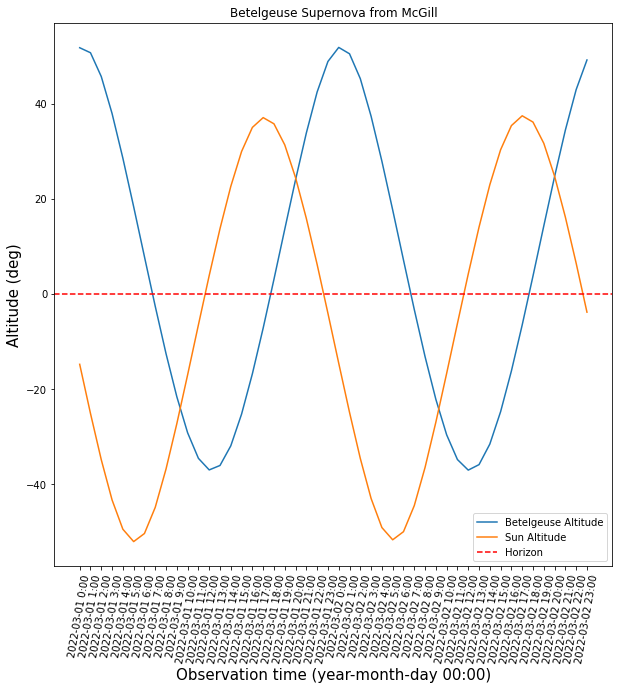

In [3]:
#Let's assume we are looking at Betelgeuse from McGill 
#Taken from Lab01
McGill = EarthLocation(lat='45d30.29m', lon='-73d34.63m')

#Determine observation time
march_break = Time('2022-03-01 6:00') #start March 1 at 1am Montreal time (6:00 UTC)

#Call function again
betelgeuse_diff_ref_frame(McGill, march_break, 'Betelgeuse Supernova from McGill', '2022', '03', 48, 0, 1) #24 hours


From the plot above, we want to look at Betelgeuse's altitude above the horizon to count how many hours it is visible for. As hinted, we only want the sun to be below the horizon for observations to be viable. Then, looking at this 2-day plot for a full period, we can tell Betelgeuse is visible during the night for 8 hours (23:30-7:30).

## Question 4

Let's compare the Hubble Space Telescope (HST) to the recently launched (and soon operational!) James Webb Space Telescope (JWST).

__a)__ First we'll compare the sensitivity of these telescopes. HST is said to have a "limiting magnitude" $+31.5$ while JWST's is $+34$. Which telescope can see fainter things? By what factor? (In reality this is not an entirely fair comparison because HST and JWST observe at different wavelengths and are good at different types of science).

Limiting magnitude is the <b>faintes apparent magnitude</b> that is detectable by an instrument. The larger the magnitude, the fainter the object is. So, the JWST is more sensitive as it can see fainter objects. 

In order to find by what factor the observable objects are fainter/brighter, we can use:
\begin{equation}
\dfrac{F_1}{F_2} = 10^{\dfrac{m_2-m_1}{2.5}}
\end{equation}

Here, flux is a measure of how faint/bright and object is, and m is apparent magnitude.
\begin{equation}
\dfrac{F_1}{F_2} = 10^{\dfrac{34-31.5}{2.5}} = 10
\end{equation}

The above result says $F_1$ is 10 times brighter than $F_2$. In turn, this tells us that the JWST is more sensitive by a factor of 10, can see objects 10 time fainter. 

__b)__ Produce the following plots:
* The minimum luminosity of an object (expressed in absolute magnitudes) that can be seen by HST and JWST as a function of redshift $z$
* The same plots but with the luminosity expressed in units of the Solar luminosity $L_\odot$
* The previous two plots but as a function of distance rather than redshift.

Have your plots span $0 < z < 10$, and make sure the plots are visually easy to read. (Marks will be deducted if, for example, the trends cannot be easily seen because of inappropriate axis ranges).


C:\Users\15145\anaconda3\lib\site-packages\astropy\cosmology\core.py:1449: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


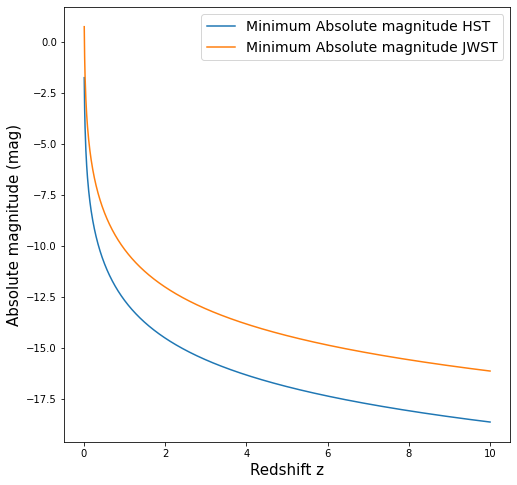

In [4]:
from astropy.cosmology import Planck15
#Generate an array of redshift
z = np.linspace(0, 10, 1000)

#Assume cosmology given by Planck15
D_mod = Planck15.distmod(z).value #compute distance modulus using redshift


min_abs_mag_HST = 31.5 - D_mod
min_abs_mag_JWST = 34 - D_mod
plt.figure(figsize=(8,8))
plt.plot(z, min_abs_mag_HST, label='Minimum Absolute magnitude HST')
plt.plot(z, min_abs_mag_JWST, label='Minimum Absolute magnitude JWST')
plt.legend(fontsize=14)
plt.xlabel('Redshift z', fontsize=15)
plt.ylabel('Absolute magnitude (mag)', fontsize=15)
plt.show()


The plot produced above for <b>Minimum absolute magnitude vs. redshift</b> makes sense; at a larger redshift, which corresponds to a larger distance, the object we are observing must be much brighter (have a smaller absolute magnitude) so that it can be observed.  

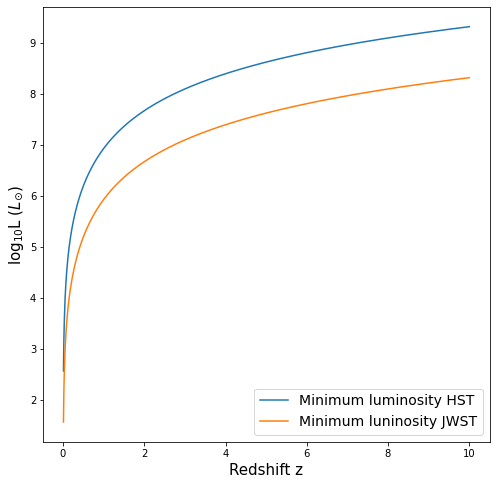

In [5]:
#Now, we want to reproduce the plot above but with luminosities in terms of the sun luminosity 
L_log10_HST = -(min_abs_mag_HST - 4.67)/2.5
L_log10_JWST = -(min_abs_mag_JWST - 4.67)/2.5 #4.67 is the absolute solar magnitude

plt.figure(figsize=(8,8))
plt.plot(z, L_log10_HST, label='Minimum luminosity HST')
plt.plot(z, L_log10_JWST, label='Minimum luninosity JWST')
plt.legend()
plt.xlabel('Redshift z', fontsize=15)
plt.ylabel('$\mathrm{log}_{10}\mathrm{L}$ $(L_{\odot})$', fontsize=15)
plt.legend(loc='lower right', fontsize=14)
plt.show()

The plot produced for <b>Minimum Luminosity vs. Redshift</b> makes sense; it also makes sense that it has the opposite shape as the plot before. For larger distances, with alrger redshift, an object must be more luminous for it to be observed.

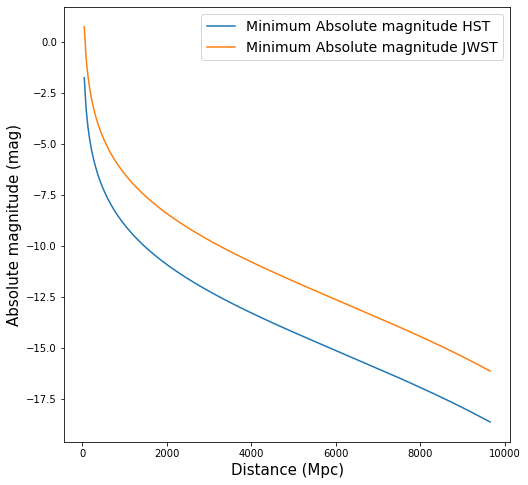

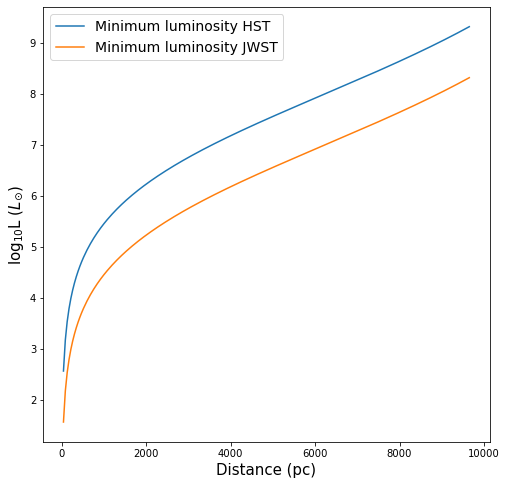

In [6]:
#Now we want as a function of distance. 

D = Planck15.comoving_distance(z) #find distance from comoving distance as a function of redshift z

#Plot as a function of D
plt.figure(figsize=(8,8))
plt.plot(D, min_abs_mag_HST, label='Minimum Absolute magnitude HST')
plt.plot(D, min_abs_mag_JWST, label='Minimum Absolute magnitude JWST')
plt.legend(fontsize=14)
plt.xlabel('Distance (Mpc)', fontsize=15)
plt.ylabel('Absolute magnitude (mag)', fontsize=15)
plt.show()

plt.figure(figsize=(8,8))
plt.plot(D, L_log10_HST, label='Minimum luminosity HST')
plt.plot(D, L_log10_JWST, label='Minimum luminosity JWST')
plt.legend(fontsize=14)
plt.xlabel('Distance (pc)', fontsize=15)
plt.ylabel('$\mathrm{log}_{10}\mathrm{L}$ $(L_{\odot})$', fontsize=15)
plt.show()



__c)__ Suppose we lived in a (fake) universe that contained only three types of galaxies, each of which have an exact well-defined luminosity:
* Type A galaxies that have luminosity $L = 10^{8}L_\odot$. These galaxies have a number density of $10^{-2}$ per comoving Mpc$^{3}$.
* Type B galaxies that have luminosity $L = 10^{10}L_\odot$. These galaxies have a number density of $5 \times 10^{-2}$ per comoving Mpc$^{3}$.
* Type C galaxies that have luminosity $L = 10^{12}L_\odot$. These galaxies have a number density of $10^{-3}$ per comoving Mpc$^{3}$.

Now imagine (completely unrealistically) that we get to use HST and JWST to perform a galaxy survey over the entire sky. How many of each galaxy type should I expect to find?

We know
\begin{equation}
L_{log10} = -(M- 4.67)/2.5
\end{equation}
From this equation, solve for M and then find distance with: 
\begin{equation}
d = 10pc \times 10^{(m − M)/5}
\end{equation}
where m is the limiting apparent magnitude and d is in parsecs. This way, for a given luminosity we can find the maximum distance that a certain telescope might observe. 

In [7]:
L_A = 10**8
L_B = 10**10
L_C = 10**12

L = np.array([L_A, L_B, L_C])


#Number density n = N/V_survey
n_A = 10**(-2) #In this case, this is the number density PER comoning Mpc^3
n_B = 5*10**(-2)
n_C = 10**(-3)

dn = np.array([n_A, n_B, n_C])

#The following code was "inspired" by a similar question from Lab04
def volume(Lum, m_max):
    
    M = (-2.5*np.log(Lum)) + 4.67 #because we want L_log10
    
    d_max = 10*(10**((m_max - M)/5)) #returns in pc --> convert to Mpc
    d_max = d_max * 10**(-6)
    #print(d_max)
    #Compute volume --> assume a sphere, since we are not given m_min to compute d_min
    V_survey = (4*np.pi)/3 * (d_max**3)
    return V_survey

#Once we have a volume, we can find N = dn * Volume

V_HST = volume(L, 31.5)
V_JWST = volume(L, 34)

N_HST = dn * V_HST
N_JWST = dn * V_JWST

print('Number of galaxies of each type seen with HST: ', N_HST)
print('Number of galaxies of each type seen with JWST: ', N_JWST)

Number of galaxies of each type seen with HST:  [2.24444892e+27 9.07475708e+34 1.46764251e+40]
Number of galaxies of each type seen with JWST:  [7.09757067e+28 2.86969016e+36 4.64109313e+41]


Do the numbers make sense? 
We previously said that the JWST is more sensitive and can see fainter objects, comparing to HST. This is reflected in the numbers above, with the JWST survey, we found more of each galaxy. 

## Question 5

Note that this question is designed to be a little bit more open-ended than the others. You will need to explain your answer **in addition** to performing some simple calculations.

I am interested in designing a spam filter that decides if an email is suspicious or not by looking for various key words. Would the word "free" be a good one to use? Support your answer with a calculation. Feel free to collect some data from your own inbox! If the word "free" is an effective one to use, what would be an example of an ineffective word? And why would it be ineffective? If you decide that "free" is ineffective, give an example of a better choice. In both cases, explain why. (Ideally with some numerical examples).

Let's use Bayesian inference to decide if using the word "free" is good for the spam filter. I will follow the example seen in class for the hypothetical error on Prof. Liu's paper.

We are interested in posterior probability p(spam email | contains word free). Using Bayes' theorem:

\begin{equation}
\text{p(spam | free)} = \dfrac{ \text{p(free | spam)} \times \text{p(spam)}}{\text{p(free)}}
\end{equation}

I will do a quick search on my email with the word "Free" to get some idea of the different probabilities, as well as Google searches to get some more information. 

Prior $\text{p(spam)} = 0.25$. A quick google search reveals that about 25% of emails are spam. 

Now, we want to compute likelihood. In my gmail, in the spam folder, 29 emails out of 66 contained the word "free". This gives about 44%, so $\text{p(free | spam)} = 0.44$. 

To compute the evidence, we need to consider two cases:
1. The email contains the word "Free" but it is NOT a spam email
\begin{equation}
\text{p(free}\cap \text{not spam}) = \text{p(free | no spam)} \times \text{p(no spam)}
\end{equation}
\begin{equation}
\text{p(free}\cap \text{not spam}) = (0.46)(1-0.25) = 0.345
\end{equation}


From my email, I looked into the normal folder (not spam) and found that out of 2608 emails, 1202 contained "free". This means $\text{p(free | no spam)} = 0.46$. High number! My gmail is not doing a very good job at flagging spam emails, because a lot of these in my normal inbox were promotions. However, a Google search suggests this number should be closer to 0.20. 
\begin{equation}
\text{p(free}\cap \text{not spam}) = (0.20)(1-0.25) = 0.15
\end{equation}


2. The email contains the word "Free" and it is a spam email
\begin{equation}
\text{p(free}\cap \text{spam}) = \text{p(free | spam)} \times \text{p(spam)}
\end{equation}
\begin{equation}
\text{p(free}\cap \text{spam}) = (0.44)(0.25) = 0.11
\end{equation}

Then,
\begin{equation}
\text{p(free}) = 0.15 + 0.11 = 0.26
\end{equation}

We can now compute the posterior distribution:
\begin{equation}
\text{p(spam | free)} = \dfrac{0.44 \times 0.25}{0.26} = .42
\end{equation}

From Bayes' theorem, the probability of an email being spam because it contains the word "free" is 42%. I believe this is good enough to consider "free" a good choice for a spam filter. 

## Question 6

Tony and Stephen are selling cakes on rue Sherbrooke. Their boss, Carol, has noticed that the number of cakes they sell per hour is well-modelled by a Poisson distribution. That is, if $n$ is a random variable signifying the number of cakes sold in an hour, the probability distribution $p(n)$ is given by

\begin{equation}
p(n) = \frac{e^{-\lambda} \lambda^n}{n!}
\end{equation}

Carol has noticed, however, that the mean number of cakes sold per hour is different for her two salespeople. In other words, $\lambda_\textrm{tony} \neq \lambda_\textrm{stephen}$. Through years of observations, she has determined that $\lambda_\textrm{tony} = 5$ and $\lambda_\textrm{stephen} = 8$.

Today, Stephen worked for 6 hours and claimed that he sold $6$, $6$, $8$, $8$, $6$, $8$ cakes (each number represents the number of cakes sold in an hour). These numbers are kinda low for Stephen, so Carol confronts him and asks him if Tony had secretly substituted for him. Stephen objects. He says that there are always random fluctuations, and that he'll really need to see a rigorous statistical analysis.

Carol turns to you for help, asking you to use your Bayesian inference skills to help her out. Can you help her? Do you think Tony substituted for Stephen? How confident are you in your conclusion?

Using Bayesian inference, we want to find out the posterior p( lambda | sold cakes) = the probability distribution of possible lambda values given data of sold cakes. From this distribution, we will be able to approximate a lambda value that corresponds to the data collected by Carol, and we can tell which person sold the cakes. 

Use the formula:

\begin{equation}
p( \lambda | \text{sold cakes}) = \dfrac{p(\text{sold cakes} | \lambda) p(\lambda)}{p(\text{sold cakes})}
\end{equation}

From now on, let n = sold cakes in an hour. Wi will also ignore the evidence $p(\text{sold cakes})$ such that:
\begin{equation}
p( \lambda | \text{n}) \propto p(\text{n} | \lambda) p(\lambda)
\end{equation}


First, compute likelihood. We are told that p(n) given lambda is a Poisson distribution: 

\begin{equation}
p(n | \lambda) = \frac{e^{-\lambda} \lambda^n}{n!}
\end{equation}


Then, assume prior p($\lambda$) is a Gaussian distribution of the form:

\begin{equation}
p(\lambda) = \frac{1}{\sqrt{2 \pi \sigma_p^2}} \exp \left[- \frac{(\lambda - \lambda_{guess})^2}{2 \sigma_p^2}\right],
\end{equation}
where $\sigma_p$ is the uncertainty in my prior knowledge.


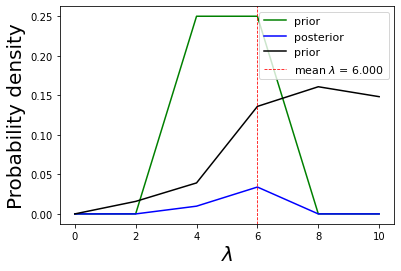

In [82]:
#The following functions are taken from Lab05
import scipy
from sklearn import preprocessing

def normalize(y,x):
    dx = x[1]-x[0]
    return y/np.sum(y*dx)
    #return preprocessing.normalize((y,x))

def likelihood(n):
    Lambda = np.linspace(0, 10, 6) #generate possible lambda values --> only 6 values of lambda because we only have 6 hours
    fac = scipy.special.factorial(n)
    p_n =  (np.exp(-Lambda)*(Lambda**n))/fac
    normed_p_n = normalize(p_n, Lambda)
        
    return normed_p_n

def prior(mean, sigma):
    Lam = np.linspace(0, 10, 6) # generate some possible lambda values 0-10
    #fac =  1 / np.sqrt(2*np.pi*sigma) 
    gauss_dist =  np.exp(- (Lam - mean)**2 / (2*sigma**2)) # the gaussian distribution of the prior
    norm_gauss = normalize(gauss_dist, Lam)
    # plot
    #plt.plot(b, gauss_dist, label='prior', color = 'skyblue')
    return norm_gauss

def prior_like_post(Lam_guess, confidence, n):
    #Find prior
    prior_n = prior(Lam_guess, confidence) 
    
    #Find likelihood
    likelihood_n = likelihood(n) 
   

    # posterior is prior*likelihood
    Lam = np.linspace(0, 10, 6)
    posterior = prior_n*likelihood_n
    normed_post = normalize(posterior, Lam) #normalize
 
    max_post = Lam[normed_post == np.max(normed_post)]

    # plot the posterior, likelihood, and prior
    plt.plot(Lam, prior_n, label = 'prior', color='green')
    plt.plot(Lam, posterior, label = 'posterior', color='blue')
    plt.plot(Lam, likelihood_n, label = 'prior', color='black')
    plt.axvline(x = max_post,color = 'r', linestyle = '--', label = 'mean $\lambda$ = %1.3f'%max_post, linewidth = 0.8)
    plt.xlabel('$\lambda$', fontsize=20)
    plt.ylabel('Probability density',fontsize=20)
    plt.legend(fontsize=11)
    #plt.title(, fontsize=15)
    plt.show()

    return prior_n, likelihood_n, normed_post, max_post


#Since carol believes that Tony secretly substituted Stephen, we will guess a lambda close to that of Tony
lambda_guess = 5
n_cakes = np.array([6,  6,  8,  8,  6,  8]) #DATA (sold cakes)
#Carol seems to be confident that Stephen is lying to her, so we will use a confidence of 70%
post_cakes = prior_like_post(lambda_guess, 0.7, n_cakes)

Our Bayes' inference suggests that Carol is right in her reasoning and Tony indeed substituted Stephen, hence Bayes' theorem returns $\lambda$ close to that of Tony. What if we guess something closer to Stephen's $\lambda$? or what if Carol is not as sure? 

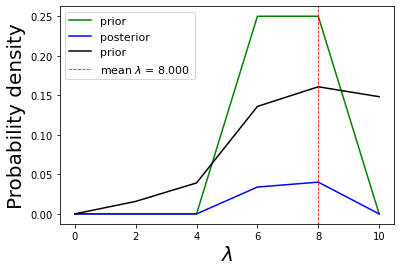

In [85]:
lambda_guess = 7
post_cakes = prior_like_post(lambda_guess, 0.4, n_cakes)

In this case, Bayes' inference says that Stephen is right, he sold the cakes but his numbers are lower because of fluctuations. The difference in outcomes might be due to how sure Carol is in her claim; if the prior is too strong, Bayes' theorem has no other choise but to "follow it". 

This code is very sensitive to the initial guess and confidence percentage given.

I would like to tailor the last third of the course to your interests, as well as to get your overall feedback on things. Please fill out [this](https://forms.gle/Sy4Lf6QVdYdUA23a6) anonymous survey to help me with that. This is not a graded part of your midterm, but now is just a convenient time to do it.

## Submission

You're done! Do a final git commit, taking care to include everything relevant (e.g., if you created a new ``tools.py`` file, be sure to include it). If you decide to revise your answers before the deadline, no problem---just make the changes you want to make and resubmit your work. Push your work to your repo, and send me an invitation to the repo (my Github username is acliu)